In [2]:
def get_percentage_decrease_json(json, min_key=1024):
    min_val = json[min_key]['wer']
    out = {}
    for key in json:
        if key != min_key:
            out[key] = (min_val - json[key]['wer']) / min_val * 100
    return out

def get_data(df, dataset='earnings22', split='test', return_all=False):
    seq_lens = df['seq_len'].unique().tolist()
    print(seq_lens)

    out_data = {}
    for seq_len in seq_lens:
        sset = df.loc[df['dataset'] == dataset].loc[df['split'] == split].loc[df['seq_len'] == seq_len]
        if not return_all:
            out_data[seq_len] = {'wer': sset['wer'].mean()*100, 'std': sset['wer'].std()*100}
        else:
            out_data[seq_len] = [el*100 for el in sset['wer'].tolist()]
        if len(sset) != 3:
            print(f'Sequence length {seq_len} has {len(sset)} results')
    return out_data


In [3]:
%cd ./Stanage/users/acp21rjf/long-context-asr/eval/results

[Errno 2] No such file or directory: './Stanage/users/acp21rjf/long-context-asr/eval/results'
/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval/results


In [4]:
!ls

augmentation.pdf	     evals_rotary_pos_12l_256d.csv
eval.ipynb		     evals_rotary_pos_3l.csv
evals_3l_1hr_interp.csv      evals_rotary_pos_6l_256d.csv
evals_fourier_pos.csv	     model_sizes_dev.pdf
evals_fourier_pos_spec1.csv  model_sizes.pdf
evals_no_rotary.csv	     old
evals_rb.csv		     seq_len_interpolation.pdf
evals_rb_seqlen_16384.csv    wer_pos_earnings.pdf
evals_rb_seqlen.csv	     werr_rb_across_datasets.pdf


In [5]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [6]:
[csv1.loc[csv1['seq_len'] == seq_len]['wer'].mean()*100 for seq_len in seq_lens_1]

NameError: name 'seq_lens_1' is not defined

/tmp/ipykernel_8970/46881132.py:13: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


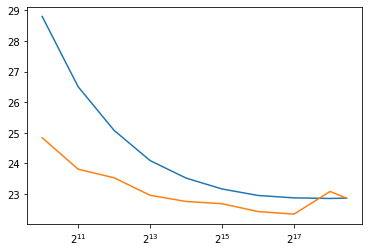

In [37]:
csv1 = pd.read_csv('evals_3l_1hr_interp.csv')
seq_lens_1 = sorted(csv1['seq_len'].unique().tolist())

csv2 = pd.read_csv('evals_rotary_pos_3l.csv')
csv2 = csv2.loc[csv2['split'] == 'test'].loc[csv2['dataset'] == 'earnings22']
seq_lens_2 = sorted(csv2['seq_len'].unique().tolist())

csv3 = pd.read_csv('evals_rb_seqlen.csv')
csv3 = csv3.loc[csv3['split'] == 'test'].loc[csv3['dataset'] == 'earnings22']
seq_lens_3 = sorted(csv3['seq_len'].unique().tolist())


plt.xscale('log', basex=2)
plt.plot(seq_lens_1, [csv1.loc[csv1['seq_len'] == seq_len]['wer'].mean()*100 for seq_len in seq_lens_1], label='3L 1hr')
plt.plot(seq_lens_2, [csv2.loc[csv2['seq_len'] == seq_len]['wer'].mean()*100 for seq_len in seq_lens_2], label='Rotary Pos')
#plt.plot(seq_lens_3, [csv3.loc[csv3['seq_len'] == seq_len]['wer'].mean()*100 for seq_len in seq_lens_3], label='RB SeqLen')

/tmp/ipykernel_12874/333254983.py:14: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


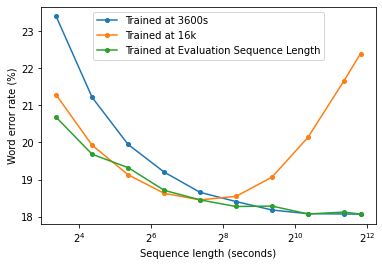

In [40]:
rb = pd.read_csv('evals_rb.csv')
rb_360k = pd.read_csv('evals_rb_seqlen.csv')
rb_16k = pd.read_csv('evals_rb_seqlen_16384.csv')

seqs = sorted(list(set(rb_360k.seq_len))) 
wers = [rb_360k.loc[rb_360k['seq_len'] == seq]['wer'].mean() for seq in seqs] + [rb.loc[rb['dataset'] == 'earnings22'].loc[rb['split'] == 'test'].loc[rb['seq_len'] == 360000].wer.mean()]
seqs = seqs + [360000]
wers_train = [rb.loc[rb['dataset'] == 'earnings22'].loc[rb['split'] == 'test'].loc[rb['seq_len'] == seq]['wer'].mean() for seq in seqs]

seqs_16k = sorted(list(set(rb_16k.seq_len)))
wers_16k = [rb_16k.loc[rb_16k['seq_len'] == seq]['wer'].mean() for seq in seqs_16k]

# log scale
plt.xscale('log', basex=2)
plt.plot([el/100 for el in seqs], [el*100 for el in wers], label='Trained at 3600s', marker='o', markersize=4)
plt.plot([el/100 for el in seqs_16k], [el*100 for el in wers_16k], label='Trained at 16k', marker='o', markersize=4)
plt.plot([el/100 for el in seqs], [el*100 for el in wers_train], label='Trained at Evaluation Sequence Length', marker='o', markersize=4)

# limit y axis
#plt.ylim(18, 20.8)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('Word error rate (%)')
plt.legend()
plt.savefig('seq_len_interpolation.pdf', bbox_inches='tight')
plt.show()

[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 360000]
Sequence length 1024 has 2 results
Sequence length 4096 has 2 results
Sequence length 8192 has 2 results
Sequence length 32768 has 2 results
Sequence length 65536 has 1 results
Sequence length 262144 has 2 results
Sequence length 360000 has 2 results
[2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 360000, 1024]


/tmp/ipykernel_12874/3014625091.py:19: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


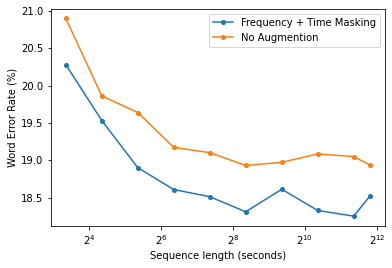

In [39]:
csv1 = pd.read_csv('evals_fourier_pos_spec1.csv', sep=',')
csv2 = pd.read_csv('evals_fourier_pos.csv', sep=',')

dataset = 'earnings22'
split = 'test'
csv1_data = csv1.loc[csv1['dataset'] == dataset ].loc[csv1['split'] == split]
csv2_data = csv2.loc[csv2['dataset'] == dataset ].loc[csv2['split'] == split]
seq_lens = [512*2**(i+1) for i in range(9)] + [360000]

csv1_vals = [csv1_data.loc[csv1_data['seq_len'] == seq_len].wer.mean() for seq_len in seq_lens]
csv2_vals = [csv2_data.loc[csv2_data['seq_len'] == seq_len].wer.mean() for seq_len in seq_lens]

csv1_data_dict = {seq_len: {'wer':csv1_data.loc[csv1_data['seq_len'] == seq_len].wer.mean()} for seq_len in seq_lens}
csv2_data_dict = {seq_len: {'wer':csv2_data.loc[csv2_data['seq_len'] == seq_len].wer.mean()} for seq_len in seq_lens}

c1 = get_data(csv1, dataset='earnings22', split='test')
c2 = get_data(csv2, dataset='earnings22', split='test')

plt.xscale('log', basex=2)
plt.plot([el/100 for el in seq_lens], [csv1_data_dict[seq_len]['wer']*100 for seq_len in seq_lens], label='Frequency + Time Masking', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens], [csv2_data_dict[seq_len]['wer']*100 for seq_len in seq_lens], label='No Augmention', marker='o', markersize=4)
plt.legend()
plt.xlabel('Sequence length (seconds)')
plt.ylabel('Word Error Rate (%)')
plt.savefig('augmentation.pdf', bbox_inches='tight')
plt.show()


# csv1_decrease_from2 = {}
# for key in c1:
#     csv1_decrease_from2[key] = (c2[key]['wer'] - c1[key]['wer']) / c2[key]['wer'] * 100

# plt.xscale('log', basex=2)
# plt.plot([el/100 for el in seq_lens], [csv1_decrease_from2[seq_len] for seq_len in seq_lens], label='Frequency + Time Masking', marker='o', markersize=4)


In [14]:
get_percentage_decrease_json(csv4_data_dict, min_key=1024)

{2048: 2.4920772111783385,
 4096: 5.51234034380103,
 16384: 8.167675021607629,
 32768: 7.000864304235104,
 65536: 4.494382022471899,
 131072: 5.108998367425345,
 360000: 5.608374147699983}

In [18]:
csv3_data_dict

{2048: {'wer': 23.869043971978833, 'std': 0.4528835027345258},
 4096: {'wer': 23.410194092137594, 'std': 0.020961139797183566},
 16384: {'wer': 22.839695280109463, 'std': 0.15781762961380372},
 32768: {'wer': 22.939770847374543, 'std': 0.2368431511847608},
 65536: {'wer': 22.892796601515432, 'std': 0.0},
 131072: {'wer': 23.1446874851078, 'std': 0.2939459364341346},
 262144: {'wer': 23.24067833534165, 'std': 0.2150724089649798},
 360000: {'wer': 23.293098870575733, 'std': 0.13720332848124753},
 1024: {'wer': 24.472560913342726, 'std': 0.17474403227655655},
 8192: {'wer': 23.030315408233424, 'std': 0.4095798813466224}}

In [54]:
get_data(df=csv4, dataset=dataset, split=split, return_all=True)

[2048, 4096, 16384, 32768, 65536, 131072, 360000, 1024, 8192, 262144]
Sequence length 2048 has 2 results
Sequence length 4096 has 2 results
Sequence length 32768 has 2 results
Sequence length 65536 has 2 results
Sequence length 131072 has 1 results
Sequence length 360000 has 2 results
Sequence length 1024 has 2 results
Sequence length 262144 has 1 results


{2048: [20.5052794967629, 20.968894879807202],
 4096: [20.3132977962952, 19.8762330739538],
 16384: [19.4963543900496, 19.563752221064902, 19.959969773094],
 32768: [19.8394706206728, 19.7169291097359],
 65536: [20.3112554377795, 19.6291076935645],
 131072: [20.1805444927803],
 360000: [19.6822090149705, 20.466474684966197],
 1024: [21.2670792230868, 21.773584134959002],
 8192: [20.0845536425464, 20.5073218552785, 21.0342503523068],
 262144: [19.9987745848906]}

In [52]:
csv4 = pd.read_csv('evals_rotary_pos_12l_256d.csv', sep=',', error_bad_lines=False)
csv4

/home/robertflynn/anaconda3/envs/ML/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0.0,earnings22,test,0.205053,rotary_pos_12l_256d,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2.0,False,2048.0,0.875,SCConformerXL,-1.0
1,0.0,earnings22,test,0.209689,rotary_pos_12l_256d,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3.0,False,2048.0,0.875,SCConformerXL,-1.0
2,0.0,earnings22,test,0.203133,rotary_pos_12l_256d,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2.0,False,4096.0,0.875,SCConformerXL,-1.0
3,0.0,earnings22,test,0.198762,rotary_pos_12l_256d,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3.0,False,4096.0,0.875,SCConformerXL,-1.0
4,0.0,earnings22,test,0.194964,rotary_pos_12l_256d,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1.0,False,16384.0,0.875,SCConformerXL,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.0,earnings22,test,0.200846,rotary_pos_12l_256d,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1.0,False,8192.0,0.875,SCConformerXL,0.0
67,0.0,earnings22,test,0.205073,rotary_pos_12l_256d,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2.0,False,8192.0,0.875,SCConformerXL,0.0
68,0.0,earnings22,test,0.210343,rotary_pos_12l_256d,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3.0,False,8192.0,0.875,SCConformerXL,0.0
69,0.0,earnings22,test,0.199600,rotary_pos_12l_256d,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2.0,False,16384.0,0.875,SCConformerXL,0.0


In [60]:
csv1 = pd.read_csv('evals_rotary_pos_12l_256d.csv', sep=',')
csv1.loc[csv1['dataset'] == 'earnings22'].loc[csv1['split'] == 'test']
csv1_data_dict = get_data(df=csv1, dataset=dataset, split=split, return_all=True)
csv1_data_dict

[2048.0, 4096.0, 16384.0, 32768.0, 65536.0, 131072.0, 360000.0, 1024.0, 8192.0, 262144.0, nan]
Sequence length 2048.0 has 2 results
Sequence length 4096.0 has 2 results
Sequence length 32768.0 has 2 results
Sequence length 65536.0 has 2 results
Sequence length 131072.0 has 1 results
Sequence length 360000.0 has 2 results
Sequence length 1024.0 has 2 results
Sequence length 262144.0 has 1 results
Sequence length nan has 0 results


{2048.0: [20.5052794967629, 20.968894879807202],
 4096.0: [20.3132977962952, 19.8762330739538],
 16384.0: [19.4963543900496, 19.563752221064902, 19.959969773094],
 32768.0: [19.8394706206728, 19.7169291097359],
 65536.0: [20.3112554377795, 19.6291076935645],
 131072.0: [20.1805444927803],
 360000.0: [19.6822090149705, 20.466474684966197],
 1024.0: [21.2670792230868, 21.773584134959002],
 8192.0: [20.0845536425464, 20.5073218552785, 21.0342503523068],
 262144.0: [19.9987745848906],
 nan: []}

In [46]:
csv4_data

{2048: 3.6395558508111816,
 4096: 6.624276359494866,
 16384: 8.582455474360025,
 32768: 8.095283287463012,
 65536: 7.203188763405162,
 131072: 6.225680933851809,
 360000: 6.719180032267065,
 8192: 4.545885925785219,
 262144: 7.070323621524137}

In [52]:
[el/100 for el in seq_lens[1:] if el in list(csv4_data.keys())]

[20.48, 40.96, 81.92, 163.84, 327.68, 655.36, 1310.72, 2621.44, 3600.0]

In [55]:
seq_lens[1:][2] in list(csv4_data.keys())

True

In [50]:
csv4_data.keys()

dict_keys([2048, 4096, 16384, 32768, 65536, 131072, 360000, 8192, 262144])

/home/robertflynn/anaconda3/envs/ML/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_6125/3049581840.py:17: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 360000]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[2048, 4096, 16384, 32768, 65536, 131072, 262144, 360000, 1024, 8192]
Sequence length 32768 has 2 results
Sequence length 65536 has 2 results
Sequence length 1024 has 2 results
[2048, 4096, 16384, 32768, 65536, 131072, 360000, 1024, 8192, 262144]
Sequence length 2048 has 2 results
Sequence length 4096 has 2 results
Sequence length 32768 has 2 results
Sequence length 65536 has 2 results
Sequence length 131072 has 1 results
Sequence length 360000 has 2 results
Sequence length 1024 has 2 results
Sequence length 262144 has 1 results


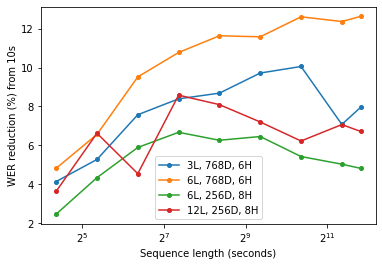

In [11]:
csv1 = pd.read_csv('evals_rotary_pos_3l.csv', sep=',')
csv2 = pd.read_csv('evals_rb.csv', sep=',')
csv3 = pd.read_csv('evals_rotary_pos_6l_256d.csv', sep=',')
csv4 = pd.read_csv('evals_rotary_pos_12l_256d.csv', sep=',', error_bad_lines=False)

seq_lens = [512*2**(i+1) for i in range(9)] + [360000]

split = 'test'
dataset = 'earnings22'
csv1_data_dict = get_data(df=csv1, dataset=dataset, split=split)
csv2_data_dict = get_data(df=csv2, dataset=dataset, split=split)
csv3_data_dict = get_data(df=csv3, dataset=dataset, split=split)
csv4_data_dict = get_data(df=csv4, dataset=dataset, split=split)

csv4_data = get_percentage_decrease_json(csv4_data_dict, min_key=1024)

plt.xscale('log', basex=2)
plt.plot([el/100 for el in seq_lens[1:]], [get_percentage_decrease_json(csv1_data_dict, min_key=1024)[seq_len] for seq_len in seq_lens[1:]], label='3L, 768D, 6H', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens[1:]], [get_percentage_decrease_json(csv2_data_dict, min_key=1024)[seq_len] for seq_len in seq_lens[1:]], label='6L, 768D, 6H', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens[1:]], [get_percentage_decrease_json(csv3_data_dict, min_key=1024)[seq_len] for seq_len in seq_lens[1:]], label='6L, 256D, 8H', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens[1:] if el in csv4_data], [csv4_data[el] for el in seq_lens[1:] if el in csv4_data], label='12L, 256D, 8H', marker='o', markersize=4)

plt.legend()
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('model_sizes.pdf', bbox_inches='tight')
plt.show()


In [66]:
csv.loc[csv['dataset'] == 'earnings22'].loc[csv['split'] == 'dev']

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0,earnings22,dev,0.311783,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,1024,0.875,SCConformerXL,-1
1,0,earnings22,dev,0.306965,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2,False,1024,0.875,SCConformerXL,-1
2,0,earnings22,dev,0.320083,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3,False,1024,0.875,SCConformerXL,-1
3,0,earnings22,dev,0.300701,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,2048,0.875,SCConformerXL,-1
4,0,earnings22,dev,0.297832,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2,False,2048,0.875,SCConformerXL,-1
5,0,earnings22,dev,0.301161,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3,False,2048,0.875,SCConformerXL,-1
6,0,earnings22,dev,0.300438,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,4096,0.875,SCConformerXL,-1
7,0,earnings22,dev,0.294525,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,2,False,4096,0.875,SCConformerXL,-1
8,0,earnings22,dev,0.299978,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,3,False,4096,0.875,SCConformerXL,-1
9,0,earnings22,dev,0.288458,rotary_pos_3l,/mnt/parscratch/users/acp21rjf/spotify/rotary_...,1,False,8192,0.875,SCConformerXL,-1


[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]


/tmp/ipykernel_10340/4089147132.py:5: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


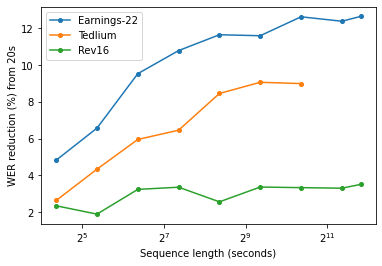

In [46]:
earnings_test = get_data(pd.read_csv('evals_rb.csv', sep=','))
tedlium_test = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='tedlium')
rev16 = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='rev16')

plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(earnings_test).keys())], [get_percentage_decrease_json(earnings_test)[key] for key in sorted(get_percentage_decrease_json(earnings_test).keys())], label='Earnings-22', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(tedlium_test).keys()) if el<=131072], [get_percentage_decrease_json(tedlium_test)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys()) if key<=131072], label='Tedlium', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(rev16).keys())], [get_percentage_decrease_json(rev16)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys())], label='Rev16', marker='o', markersize=4)

plt.legend()
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 20s')
plt.savefig('werr_rb_across_datasets.pdf', bbox_inches='tight') 
plt.show()

In [61]:
no_pos

{4096: {'wer': 19.720333040595275, 'std': 0.27550147126807834},
 8192: {'wer': 19.47661159106536, 'std': 0.10006167270516933},
 16384: {'wer': 19.286672249113277, 'std': 0.31272326112818755},
 2048: {'wer': 20.557700031996948, 'std': 0.20077883544219124},
 32768: {'wer': 19.091967403958087, 'std': 0.27479400653754593},
 360000: {'wer': 19.20497790848872, 'std': 0.4342514014723085},
 65536: {'wer': 19.000061270755467, 'std': 0.06429375748502734},
 131072: {'wer': 18.922451647162138, 'std': 0.07077884709336803},
 262144: {'wer': 19.456868792081092, 'std': 0.35305245312601996}}

In [140]:
original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

In [134]:
2**17

131072

In [141]:
!ls

eval_config_wd.yaml	    evals_rb_sp2.csv
eval.ipynb		    evals_rotary_pos_3l.csv
evals_fourier_pos.csv	    evals_wd.csv
evals_fourier_pos_spec1csv  model_sizes.pdf
evals_no_rotary.csv	    wer_pos_earnings.pdf
evals_rb.csv		    werr_rb_across_datasets.pdf
evals_rb_sp1.csv


In [73]:
pd.read_csv('evals_no_rotary.csv', sep=',')

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0,earnings22,dev,0.257753,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,1,False,4096,0.875,SCConformerXL,-1
1,0,earnings22,dev,0.250810,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,4096,0.875,SCConformerXL,-1
2,0,earnings22,dev,0.256110,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,1,False,8192,0.875,SCConformerXL,-1
3,0,earnings22,dev,0.250745,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,2,False,8192,0.875,SCConformerXL,-1
4,0,earnings22,dev,0.247919,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,8192,0.875,SCConformerXL,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,rev16,test,0.147264,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,2,False,65536,0.875,SCConformerXL,-1
144,0,rev16,test,0.148939,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,262144,0.875,SCConformerXL,-1
145,0,earnings22,dev,0.275405,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,1024,0.875,SCConformerXL,-1
146,0,earnings22,test,0.208443,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,1024,0.875,SCConformerXL,-1


In [24]:
no_pos

{4096: [20.037579396687292, 19.58213344770541, 19.54128627739313],
 8192: [19.52494740926822, 19.36155872801911, 19.54332863590874],
 16384: [19.19408532973878, 19.03069664848967, 19.63523476911137],
 2048: [20.38273798582603, 20.51344893082531, 20.776913179339502],
 32768: [18.84892674060004, 19.036823724036513, 19.39015174723771],
 360000: [18.88160447684986, 19.6985478830954, 19.0347813655209],
 65536: [18.981680044114942, 19.07154381880195, 18.94695994934951],
 131072: [18.84075730653759, 18.9612564589588, 18.96534117599003],
 262144: [19.29416089700386, 19.21450891489492, 19.8619365643445],
 1024: [25.00868002369136, 22.75800093948491]}

In [59]:
get_data(pd.read_csv('evals_no_rotary.csv', sep=','), split='dev', return_all=False)

[4096, 8192, 16384, 2048, 32768, 360000, 65536, 131072, 262144, 1024]
Sequence length 1024 has 2 results


{4096: {'wer': 25.49642283545043, 'std': 0.36671164412792195},
 8192: {'wer': 25.159147320776754, 'std': 0.4160634246612562},
 16384: {'wer': 24.73791794422543, 'std': 0.3940619570263112},
 2048: {'wer': 26.852095196379032, 'std': 0.22352264478699332},
 32768: {'wer': 24.315958534092562, 'std': 0.3724738361123087},
 360000: {'wer': 24.60286173163965, 'std': 0.473033031795295},
 65536: {'wer': 24.471455686961594, 'std': 0.07927842022233383},
 131072: {'wer': 24.417433201927285, 'std': 0.1578848472423873},
 262144: {'wer': 24.781719959118117, 'std': 0.5701852034552951},
 1024: {'wer': 31.03372755146736, 'std': 1.8088057827987039}}

In [80]:
pd.read_csv('evals_no_rotary.csv', sep=',')

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0,earnings22,dev,0.257753,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,1,False,4096,0.875,SCConformerXL,-1
1,0,earnings22,dev,0.250810,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,4096,0.875,SCConformerXL,-1
2,0,earnings22,dev,0.256110,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,1,False,8192,0.875,SCConformerXL,-1
3,0,earnings22,dev,0.250745,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,2,False,8192,0.875,SCConformerXL,-1
4,0,earnings22,dev,0.247919,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,8192,0.875,SCConformerXL,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,rev16,test,0.147264,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,2,False,65536,0.875,SCConformerXL,-1
144,0,rev16,test,0.148939,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,262144,0.875,SCConformerXL,-1
145,0,earnings22,dev,0.275405,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,1024,0.875,SCConformerXL,-1
146,0,earnings22,test,0.208443,no_rotary,/mnt/parscratch/users/acp21rjf/spotify/no_rota...,3,False,1024,0.875,SCConformerXL,-1


In [76]:
get_data(pd.read_csv('evals_no_rotary.csv', sep=','), split='test', return_all=True)

[4096, 8192, 16384, 2048, 32768, 360000, 65536, 131072, 262144, 1024]


{4096: [20.037579396687292, 19.58213344770541, 19.54128627739313],
 8192: [19.52494740926822, 19.36155872801911, 19.54332863590874],
 16384: [19.19408532973878, 19.03069664848967, 19.63523476911137],
 2048: [20.38273798582603, 20.51344893082531, 20.776913179339502],
 32768: [18.84892674060004, 19.036823724036513, 19.39015174723771],
 360000: [18.88160447684986, 19.6985478830954, 19.0347813655209],
 65536: [18.981680044114942, 19.07154381880195, 18.94695994934951],
 131072: [18.84075730653759, 18.9612564589588, 18.96534117599003],
 262144: [19.29416089700386, 19.21450891489492, 19.8619365643445],
 1024: [25.00868002369136, 22.75800093948491, 20.844311010354748]}

[2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 360000, 1024]
[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
[4096, 8192, 16384, 2048, 32768, 360000, 65536, 131072, 262144, 1024]


/tmp/ipykernel_10340/3039974584.py:11: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


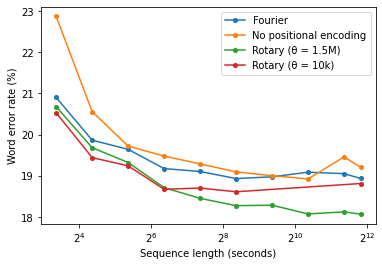

In [44]:
fourier_pos = get_data(pd.read_csv('evals_fourier_pos.csv', sep=','), split='test')
rotary_pos = get_data(pd.read_csv('evals_rb.csv', sep=','), split='test')
no_pos = get_data(pd.read_csv('evals_no_rotary.csv', sep=','), split='test') # DELETE 1 and 2!!

original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

# log scale
plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(fourier_pos.keys())], [fourier_pos[k]['wer'] for k in sorted(fourier_pos.keys())], label='Fourier', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(no_pos.keys())], [no_pos[k]['wer'] for k in sorted(no_pos.keys())], label='No positional encoding', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(rotary_pos.keys())], [rotary_pos[k]['wer'] for k in sorted(rotary_pos.keys())], label='Rotary (θ = 1.5M)', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens], original_results_earnings_test, label='Rotary (θ = 10k)', marker='o', markersize=4)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('Word error rate (%)')
plt.legend()
plt.savefig('wer_pos_earnings.pdf', bbox_inches='tight')
plt.show()

In [9]:
out_data_rb

{}

In [10]:
original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

In [22]:
path = "/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/spotify/audio_txt_pairs.json"
import json
with open(path, 'r') as f:
    data = json.load(f)

data

{'4_L_show_4LHI4R4U72hQnYQITwQt3Q_2jSYn7uwJ217wABg0r5yUU': {'audio': '/mnt/parscratch/users/acp21rjf/spotify/audio/4/L/show_4LHI4R4U72hQnYQITwQt3Q/2jSYn7uwJ217wABg0r5yUU.spec.pt',
  'txt': '/mnt/parscratch/users/acp21rjf/spotify/txt/spotify-podcasts-2020/podcasts-transcripts/4/L/show_4LHI4R4U72hQnYQITwQt3Q/2jSYn7uwJ217wABg0r5yUU.json',
  'duration': 368.063991},
 '4_L_show_4lWQiCFUnCaHqvtOUlKrHO_6lF7wKErEwZqZsHKpNvNVX': {'audio': '/mnt/parscratch/users/acp21rjf/spotify/audio/4/L/show_4lWQiCFUnCaHqvtOUlKrHO/6lF7wKErEwZqZsHKpNvNVX.spec.pt',
  'txt': '/mnt/parscratch/users/acp21rjf/spotify/txt/spotify-podcasts-2020/podcasts-transcripts/4/L/show_4lWQiCFUnCaHqvtOUlKrHO/6lF7wKErEwZqZsHKpNvNVX.json',
  'duration': 362.927891},
 '4_L_show_4L7OQeFedMf3kcVIRH6Hxm_3YaFbvsRZAAeTVQjO2Gjjn': {'audio': '/mnt/parscratch/users/acp21rjf/spotify/audio/4/L/show_4L7OQeFedMf3kcVIRH6Hxm/3YaFbvsRZAAeTVQjO2Gjjn.spec.pt',
  'txt': '/mnt/parscratch/users/acp21rjf/spotify/txt/spotify-podcasts-2020/podcasts-transc

In [23]:
def max_duration(data):
    max_dur = 0
    for key in data:
        if data[key]['duration'] > max_dur:
            max_dur = data[key]['duration']
    return max_dur

In [26]:
def podcasts_greater_than_eq_to(data, duration):
    count = 0
    count_greater = 0
    for key in data:
        if data[key]['duration'] >= duration:
            count_greater += 1
        count += 1
    return (count_greater / count) * 100

In [25]:
max_duration(data) / 60 / 60

5.082565079444445

In [65]:
2**10

1024

In [111]:
[(2**(10+i))/100/32 for i in range(14)] + [360000]

[0.32,
 0.64,
 1.28,
 2.56,
 5.12,
 10.24,
 20.48,
 40.96,
 81.92,
 163.84,
 327.68,
 655.36,
 1310.72,
 2621.44,
 360000]

In [36]:
[(podcasts_greater_than_eq_to(data, el)/100) for el in [(2**(10+i))/100/32 for i in range(14)] + [3000]]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9998576309794989,
 0.9976271829916477,
 0.988126423690205,
 0.9599183750949127,
 0.9010820045558087,
 0.7947228549734244,
 0.6346431283219438,
 0.3361522399392559,
 0.2554479878511769]

[]

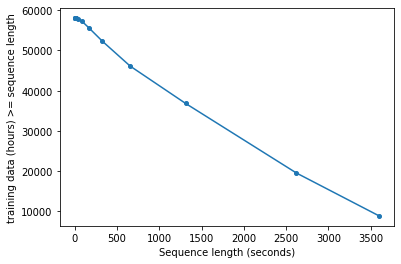

In [28]:
durs = list(zip([(2**(10+i))/100/32 for i in range(14)] + [3600], [(podcasts_greater_than_eq_to(data, el)/100)*58000 for el in [(2**(10+i))/100/32 for i in range(14)] + [3600]]) )
durs
#plt.xscale('log', basex=2)
plt.plot([el[0] for el in durs], [el[1] for el in durs], marker='o', markersize=4)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('training data (hours) >= sequence length')
plt.plot()